# <center> Hypothesis II: Inflation vs House Price Index
#### Types of Inflation measure :
- RPI (Retail Price Index)
- CPI (Consumer Price Index)
#### Retail Price Index (RPI)
The Retail Price Index (RPI) is one of the two main measures of consumer inflation produced by the United Kingdom's Office for National Statistics (ONS). It is not considered an official statistic by the U.K., but it is used for certain types of cost escalation. The RPI was introduced in the U.K. in 1947, and it was made official in 1956.

In [40]:
#importing various libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from pandas.plotting import lag_plot
from statsmodels.tsa.api import VAR
from scipy.stats.stats import kendalltau
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the RPI data
header = ['Date','RPI']
df_RPI = pd.read_excel(r'C:/Users/hp/dissertation/Datasets/RPI.xlsx',names=header,header=7)
df_RPI.head()

,Date,RPI
0,1987-01-01,100.0
1,1987-02-01,100.4
2,1987-03-01,100.6
3,1987-04-01,101.8
4,1987-05-01,101.9


In [3]:
# checking the statistics of the dataset loaded
df_RPI.describe()

,RPI
count,426.000000
mean,198.366432
std,58.890449
min,100.000000
25%,150.300000
50%,188.350000
75%,250.750000
max,340.000000


We can see from the above table , that maximum RPI is 340 whereas the minium is 100 with a mean of 198.36 and standard deviation of 58.89

In [4]:
#checking the shape of dataset
df_RPI.shape

(426, 2)

In [5]:
#checking the dataset's to and from dates
print("Starting date of RPI data :",df_RPI.Date.min())
print("Ending date of RPI data :",df_RPI.Date.max())

Starting date of RPI data : 1987-01-01 00:00:00
Ending date of RPI data : 2022-06-01 00:00:00


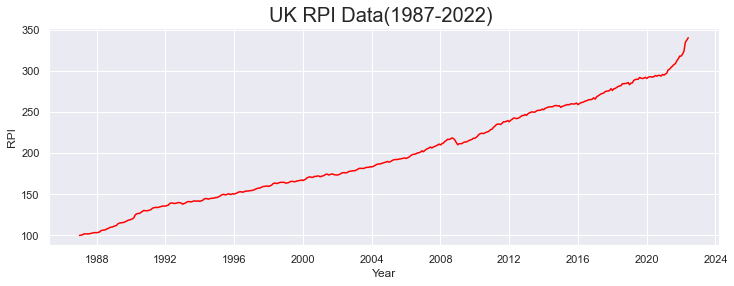

In [6]:
#plotting the RPI data
sns.set_theme(style="darkgrid")
plt.figure(figsize = (12,4))
sns.lineplot(data = df_RPI, x='Date',y='RPI',err_style='bars',color='red')
plt.title("UK RPI Data(1987-2022) ",fontdict={'fontsize':20})
plt.xlabel("Year")
plt.ylabel('RPI')
plt.show()

In [7]:
#calculating the percentage change in RPI
df_RPI['%change_RPI'] =df_RPI['RPI'].pct_change()
df_RPI.fillna(0,inplace=True)
df_RPI.head()

,Date,RPI,%change_RPI
0,1987-01-01,100.0,0.000000
1,1987-02-01,100.4,0.004000
2,1987-03-01,100.6,0.001992
3,1987-04-01,101.8,0.011928
4,1987-05-01,101.9,0.000982


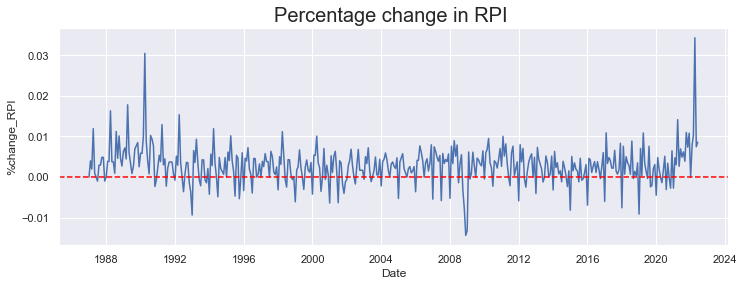

In [8]:
# plotting the percentage change in RPI
plt.figure(figsize = (12,4))
sns.lineplot(data=df_RPI,x='Date',y='%change_RPI')
plt.axhline(0, ls='--',c='red')
plt.title("Percentage change in RPI ",fontdict={'fontsize': 20})
plt.show()

### Consumer Price Index (CPI)
Data source : https://www.rateinflation.com/consumer-price-index/uk-historical-cpi/

In [9]:
# importing the dataset
df_CPI = pd.read_excel(r'C:/Users/hp/dissertation/Datasets/CPI.xlsx')
df_CPI.head()

,Date,CPI
0,1988-01-01,48.4
1,1988-02-01,48.5
2,1988-03-01,48.7
3,1988-04-01,49.3
4,1988-05-01,49.5


In [10]:
# checking the statistics of the dataset loaded
df_CPI.describe()

,CPI
count,414.000000
mean,81.673188
std,17.697839
min,48.400000
25%,69.050000
50%,77.650000
75%,99.100000
max,121.800000


We can see from the above table , that maximum RPI is 121.80 whereas the minium is 48.40 with a mean of 81.67 and standard deviation of 17.69

In [11]:
#checking the shape of dataset
df_CPI.shape

(414, 2)

In [12]:
#checking the datasets to and from dates
print("Starting date of CPI data :",df_CPI.Date.min())
print("Ending date of CPI data :",df_CPI.Date.max())

Starting date of CPI data : 1988-01-01 00:00:00
Ending date of CPI data : 2022-06-01 00:00:00


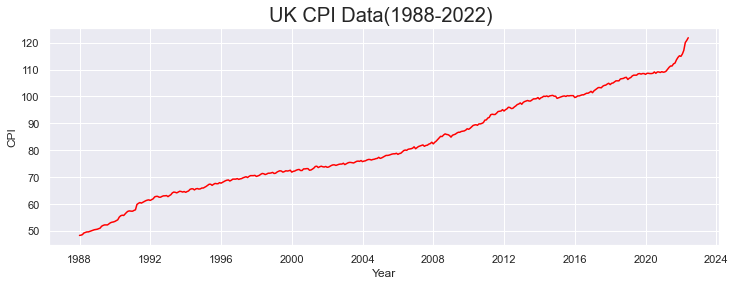

In [13]:
#plotting the RPI data
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,4))
sns.lineplot(data = df_CPI, x='Date',y='CPI',err_style='bars',color='red')
plt.title("UK CPI Data(1988-2022) ",fontdict={'fontsize':20})
plt.xlabel("Year")
plt.ylabel('CPI')
plt.show()

In [14]:
#calculating the percentage change in RPI
df_CPI['%change_CPI'] =df_CPI['CPI'].pct_change()
df_CPI.fillna(0,inplace=True)
df_CPI.head()

,Date,CPI,%change_CPI
0,1988-01-01,48.4,0.000000
1,1988-02-01,48.5,0.002066
2,1988-03-01,48.7,0.004124
3,1988-04-01,49.3,0.012320
4,1988-05-01,49.5,0.004057


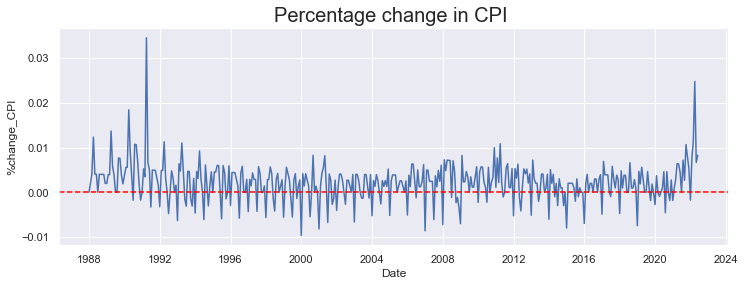

In [15]:
# plotting the percentage change in RPI
plt.figure(figsize = (12,4))
sns.lineplot(data=df_CPI,x='Date',y='%change_CPI')
plt.axhline(0, ls='--',c='red')
plt.title("Percentage change in CPI ",fontdict={'fontsize': 20})
plt.show()

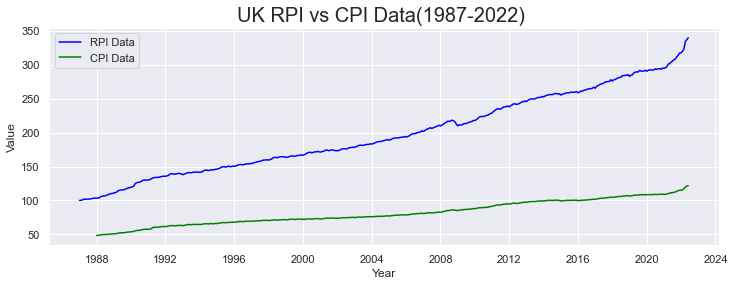

In [16]:
#plotting the RPI and CPI data together
plt.figure(figsize=(12,4))
sns.lineplot(data = df_RPI, x='Date',y='RPI',err_style='bars',color='blue',label='RPI Data')
sns.lineplot(data = df_CPI, x='Date',y='CPI',err_style='bars',color='green',label='CPI Data')
plt.title("UK RPI vs CPI Data(1987-2022) ",fontdict={'fontsize':20})
plt.xlabel("Year")
plt.ylabel('Value')
plt.show()

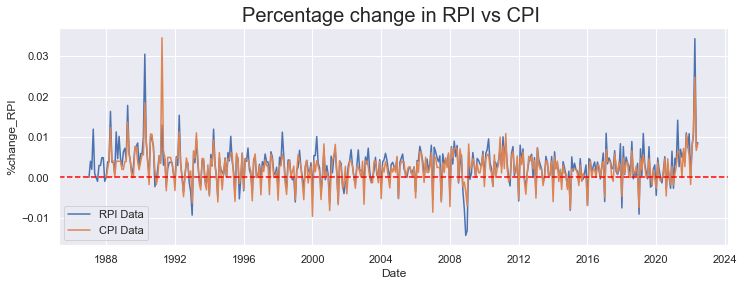

In [17]:
# plotting the percentage change in RPI and CPI together
plt.figure(figsize = (12,4))
sns.lineplot(data=df_RPI,x='Date',y='%change_RPI',label='RPI Data')
sns.lineplot(data=df_CPI,x='Date',y='%change_CPI',label='CPI Data')
plt.axhline(0, ls='--',c='red')
plt.title("Percentage change in RPI vs CPI ",fontdict={'fontsize': 20})
plt.show()

From the above chart , we can see that the percentage change in RPI is more than CPI.

### UK HPI Data

In [18]:
#importing the dataset for HPI 
df_HPI = pd.read_csv(r'C:/Users/hp/dissertation/Datasets/Indices-2022-05_ONS.csv')
# Since , we want for the United Kingdom , we would require to filter the region_name to united kingdom
df_HPI = df_HPI[df_HPI.Region_Name == 'United Kingdom']
# we require only date and index
df_HPI = df_HPI[['Date','Index']]
#Since the dataset of CPI and RPI is from 1988, thus, slicing the HPI dataset from 1988
df_HPI = df_HPI[df_HPI.Date>= '1988-01-01']
df_HPI.head()

,Date,Index
2379,1988-01-01,22.805855
2389,1988-02-01,22.805855
2399,1988-03-01,22.805855
2409,1988-04-01,24.183390
2419,1988-05-01,24.183390


In [19]:
#checking the dataset's to and from dates
print("Starting date of HPI data :",df_HPI.Date.min())
print("Ending date of HPI data :",df_HPI.Date.max())

Starting date of HPI data : 1988-01-01
Ending date of HPI data : 2022-05-01


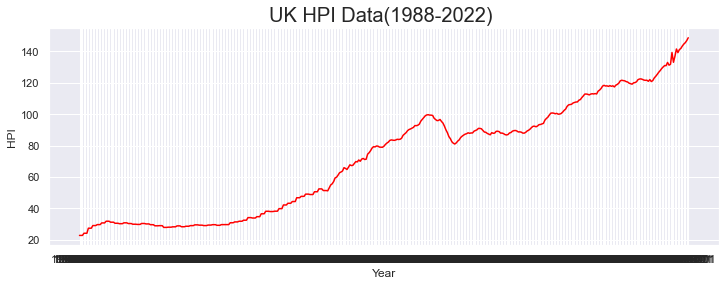

In [20]:
#plotting the RPI data
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,4))
sns.lineplot(data = df_HPI, x='Date',y='Index',err_style='bars',color='red')
plt.title("UK HPI Data(1988-2022) ",fontdict={'fontsize':20})
plt.xlabel("Year")
plt.ylabel('HPI')
plt.show()

### Checking the correlation between Inflation and HPI

In [21]:
# combing the datasets together
df_all = pd.DataFrame()
df_all[['Date','HPI']] = df_HPI[['Date','Index']]
df_all['CPI'] = df_CPI['CPI'][:-1].values
df_all['RPI']=df_RPI['RPI'][12:-1].values

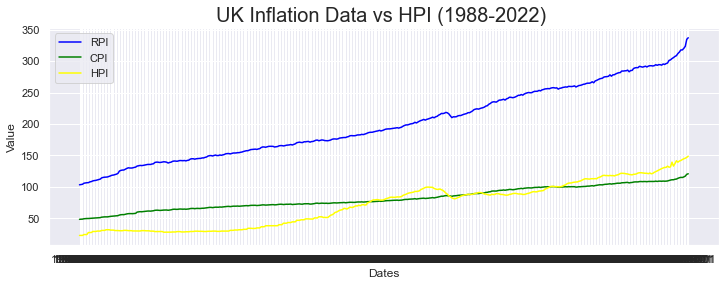

In [22]:
#plotting the RPI and CPI data together with HPI Data
plt.figure(figsize=(12,4))
sns.lineplot(data = df_all, x='Date',y='RPI',color='blue',label='RPI')
sns.lineplot(data = df_all, x='Date',y='CPI',color='green',label='CPI')
sns.lineplot(data = df_all, x='Date',y='HPI',color='yellow',label='HPI')
plt.title("UK Inflation Data vs HPI (1988-2022) ",fontdict={'fontsize':20})
plt.xlabel("Dates")
plt.ylabel('Value')
plt.show()

Step 1: Test each of the time-series to determine their order of integration. Ideally, this should involve using a test (such as the ADF test) for which the null hypothesis is non-stationarity.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


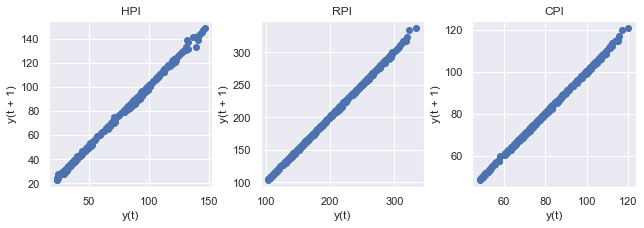

In [23]:
#plotting the lag_plots for GDP and HPI
fig,axes = plt.subplots(1, 3, figsize=(9, 3))
fig.tight_layout()
lag_plot(df_all['HPI'], ax=axes[0])
axes[0].set_title('HPI')
lag_plot(df_all['RPI'], ax=axes[1])
axes[1].set_title('RPI')
lag_plot(df_all['CPI'], ax=axes[2])
axes[2].set_title('CPI')

plt.show()

The above charts shows that it has high autocorelation.

In [24]:
# differencing the data
df1 = df_all.copy()
df_all['RPI'] = df_all['RPI']- df_all['RPI'].shift(1)
df_all['CPI'] = df_all['CPI']- df_all['CPI'].shift(1)
df_all['HPI'] = df_all['HPI']- df_all['HPI'].shift(1)
df_all = df_all.dropna()
df_all.head()

,Date,HPI,CPI,RPI
2389,1988-02-01,0.000000,0.1,0.4
2399,1988-03-01,0.000000,0.2,0.4
2409,1988-04-01,1.377535,0.6,1.7
2419,1988-05-01,0.000000,0.2,0.4
2429,1988-06-01,0.000000,0.2,0.4


In [25]:
#checking for co-relation on the data.
df1.corr(method='spearman')

,HPI,CPI,RPI
HPI,1.000000,0.966223,0.967465
CPI,0.966223,1.000000,0.999689
RPI,0.967465,0.999689,1.000000


In [26]:
#using kendalltau function to check the correlation
kendalltau(df1['HPI'],df1['CPI'])

KendalltauResult(correlation=0.8659741606319639, pvalue=1.0577117502818923e-151)

In [27]:
#using kendalltau function to check the correlation
kendalltau(df1['HPI'],df1['RPI'])

KendalltauResult(correlation=0.8718916363983841, pvalue=5.857463404643057e-154)

### The above methods show that the series are correlated. 

In [28]:
#defining a function for dicky fuller test
def adfuller_test(columns):
    result=adfuller(columns)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [29]:
#testing for HPI 
adfuller_test(df_all['HPI'])

ADF Test Statistic : -3.920995269948391
p-value : 0.0018856532414154646
#Lags Used : 16
Number of Observations Used : 395
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [30]:
#testing for CPI 
adfuller_test(df_all['CPI'])

ADF Test Statistic : -1.1690923610077026
p-value : 0.6867481275792441
#Lags Used : 16
Number of Observations Used : 395
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [31]:
#testing for RPI 
adfuller_test(df_all['RPI'])

ADF Test Statistic : -0.46213541727518337
p-value : 0.8991961332547189
#Lags Used : 14
Number of Observations Used : 397
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


Since , the RPI and CPI is non-stationary , so differencing again and testing with ADF

In [32]:
df_all['CPI'] = df_all['CPI']- df_all['CPI'].shift(1)
df_all['RPI'] = df_all['RPI']- df_all['RPI'].shift(1)
df_all = df_all.dropna()
df_all.head()

,Date,HPI,CPI,RPI
2399,1988-03-01,0.000000,0.1,-1.421085e-14
2409,1988-04-01,1.377535,0.4,1.300000e+00
2419,1988-05-01,0.000000,-0.4,-1.300000e+00
2429,1988-06-01,0.000000,0.0,-1.421085e-14
2439,1988-07-01,3.214248,-0.2,-3.000000e-01


In [33]:
#testing for CPI 
adfuller_test(df_all['CPI'])

ADF Test Statistic : -7.124151186354283
p-value : 3.657055882516886e-10
#Lags Used : 12
Number of Observations Used : 398
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [34]:
#testing for RPI 
adfuller_test(df_all['RPI'])

ADF Test Statistic : -5.548638500588652
p-value : 1.6389165508951042e-06
#Lags Used : 13
Number of Observations Used : 397
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


Now , the CPI and RPI becomes stationary after 2 differencings.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


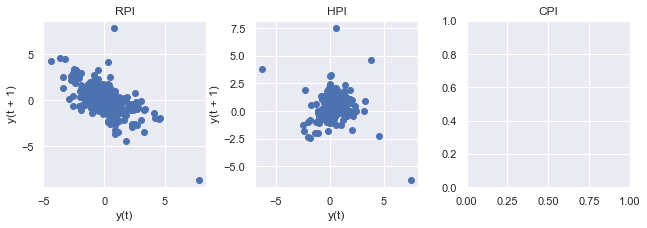

In [35]:
#plotting the lag_plots for GDP and HPI
fig,axes = plt.subplots(1, 3, figsize=(9, 3))
fig.tight_layout()
lag_plot(df_all['RPI'], ax=axes[0])
axes[0].set_title('RPI')
lag_plot(df_all['CPI'], ax=axes[0])
axes[2].set_title('CPI')
lag_plot(df_all['HPI'], ax=axes[1])
axes[1].set_title('HPI')
plt.show()

#### Moreover , the above lag plots give confirmation that the data is stationary

In [36]:
# applying VAR model and finding the AIC, BIC
df1 = df1.dropna()
model = VAR(df1[['HPI','RPI']]) #recall that rawData is w/o difference operation
for i in range(1,13):
    result = model.fit(i)
    try:
        print('Lag Order =', i)
        print('AIC : ', result.aic)
        print('BIC : ', result.bic)
        
    except:
        continue

Lag Order = 1
AIC :  -0.09146360399969276
BIC :  -0.03290501153343753
Lag Order = 2
AIC :  -0.09738303903962886
BIC :  0.0003929515807174766
Lag Order = 3
AIC :  -0.14511784750125134
BIC :  -0.00798077375545389
Lag Order = 4
AIC :  -0.3691969418158069
BIC :  -0.19255422101196723
Lag Order = 5
AIC :  -0.37020385022342994
BIC :  -0.15391003199575454
Lag Order = 6
AIC :  -0.3692115620718897
BIC :  -0.11312030206818591
Lag Order = 7
AIC :  -0.555704371581372
BIC :  -0.2596684238275494
Lag Order = 8
AIC :  -0.5659446923288394
BIC :  -0.22981590151001885
Lag Order = 9
AIC :  -0.5697280288300293
BIC :  -0.19335732248714876
Lag Order = 10
AIC :  -0.600726839165703
BIC :  -0.18396421980649535
Lag Order = 11
AIC :  -0.6466030138764237
BIC :  -0.1892975509996203
Lag Order = 12
AIC :  -0.636068263922142
BIC :  -0.13806808595374187


Result: The lag-order p = 11 on the basis of Akaike Information Criterion (AIC)


This test uses the following null and alternative hypotheses:

<B>Null Hypothesis (H0): Time series RPI does not Granger-cause time series HPI<B/>

<B>Alternative Hypothesis (HA): Time series RPI Granger-causes time series HPI<B/>

In [37]:
#perform Granger-Causality test
grangercausalitytests(df1[['HPI', 'RPI']], maxlag=[11])


Granger Causality
number of lags (no zero) 11
ssr based F test:         F=4.2181  , p=0.0000  , df_denom=379, df_num=11
ssr based chi2 test:   chi2=49.2154 , p=0.0000  , df=11
likelihood ratio test: chi2=46.4281 , p=0.0000  , df=11
parameter F test:         F=4.2181  , p=0.0000  , df_denom=379, df_num=11


{11: ({'ssr_ftest': (4.218142417434834, 6.478203914816759e-06, 379.0, 11),
   'ssr_chi2test': (49.21537142452991, 8.657047619775239e-07, 11),
   'lrtest': (46.42805690093451, 2.7160571880864167e-06, 11),
   'params_ftest': (4.218142417431216, 6.478203914910454e-06, 379.0, 11.0)},
   array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
           0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
           0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
           0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           1., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.

#### The F test statistic turns out to be 4.4852 and the corresponding p-value is 0.0. Since the p-value is less than .05,we can reject the null hypothesis of the test and conclude that knowing the RPI is useful for predicting the future HPI.
### Following the same test for CPI data

In [38]:
# applying VAR model and finding the AIC, BIC
df1 = df1.dropna()
model = VAR(df1[['HPI','CPI']]) #recall that rawData is w/o difference operation
for i in range(1,13):
    result = model.fit(i)
    try:
        print('Lag Order =', i)
        print('AIC : ', result.aic)
        print('BIC : ', result.bic)
        
    except:
        continue

Lag Order = 1
AIC :  -2.222315917954743
BIC :  -2.1637573254884876
Lag Order = 2
AIC :  -2.2089858877892308
BIC :  -2.111209897168884
Lag Order = 3
AIC :  -2.2020087240751423
BIC :  -2.0648716503293447
Lag Order = 4
AIC :  -2.4483559567349777
BIC :  -2.2717132359311383
Lag Order = 5
AIC :  -2.4285780951922935
BIC :  -2.2122842769646183
Lag Order = 6
AIC :  -2.4235048641463517
BIC :  -2.1674136041426477
Lag Order = 7
AIC :  -2.7273374018354106
BIC :  -2.431301454081588
Lag Order = 8
AIC :  -2.7285743195490215
BIC :  -2.392445528730201
Lag Order = 9
AIC :  -2.7277815981376654
BIC :  -2.351410891794785
Lag Order = 10
AIC :  -2.7489460203220246
BIC :  -2.3321834009628173
Lag Order = 11
AIC :  -2.7716360384582206
BIC :  -2.314330575581417
Lag Order = 12
AIC :  -2.7555864796938208
BIC :  -2.2575863017254205


Result: The lag-order p = 11 on the basis of Akaike Information Criterion (AIC)


This test uses the following null and alternative hypotheses:

<B>Null Hypothesis (H0): Time series CPI does not Granger-cause time series HPI<B/>

<B>Alternative Hypothesis (HA): Time series CPI Granger-causes time series HPI<B/>

In [39]:
#perform Granger-Causality test
grangercausalitytests(df1[['HPI', 'CPI']], maxlag=[11])


Granger Causality
number of lags (no zero) 11
ssr based F test:         F=3.0708  , p=0.0006  , df_denom=379, df_num=11
ssr based chi2 test:   chi2=35.8282 , p=0.0002  , df=11
likelihood ratio test: chi2=34.3206 , p=0.0003  , df=11
parameter F test:         F=3.0708  , p=0.0006  , df_denom=379, df_num=11


{11: ({'ssr_ftest': (3.070760214091237, 0.0005802648757442189, 379.0, 11),
   'ssr_chi2test': (35.82823658762916, 0.00018073118594899516, 11),
   'lrtest': (34.32058555605079, 0.0003205095227654401, 11),
   'params_ftest': (3.0707602140936627, 0.0005802648757388585, 379.0, 11.0)},
   array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
           0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
           0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
           0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           1., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0

#### The F test statistic turns out to be 3.0708   and the corresponding p-value is 0.0006. for Lag =1. Since the p-value is less than .05,we can reject the null hypothesis of the test and conclude that knowing the CPI is useful for predicting the future HPI. 
### Thus , we came to know that inflation in the country affects the House Prices.